# Part 1: Preprocessing


In [3]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML tools
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# XGBoost
import xgboost as xgb

# SHAP (for interpretability)
import shap

# Display settings
pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")


# Load & Inspect


In [4]:
# Load dataset
df = pd.read_csv("rideshare_kaggle.csv", engine="python")

In [5]:
# Shape and column info
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

Shape: (693071, 57)

Columns: ['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone', 'source', 'destination', 'cab_type', 'product_id', 'name', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'short_summary', 'long_summary', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']


In [6]:
# Preview
print("\nFirst 5 rows:")
display(df.head())


First 5 rows:


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [7]:
# Missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTi

# Data Cleaning


In [8]:
# Remove rows where price is missing
df = df.dropna(subset=['price'])

In [9]:
# Check shape after removal
print("Shape after removing missing prices:", df.shape)

Shape after removing missing prices: (637976, 57)


In [10]:
# Check duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [11]:
# Remove duplicates if any
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (637976, 57)


In [12]:
# Drop unnecessary columns (IDs, redundant or duplicate measures)
columns_to_drop = [
    'id', 'timestamp', 'datetime', 'product_id', 'timezone',
    'windGustTime', 'temperatureHighTime', 'temperatureLowTime',
    'apparentTemperatureHighTime', 'apparentTemperatureLowTime',
    'uvIndexTime', 'temperatureMinTime', 'temperatureMaxTime',
    'apparentTemperatureMaxTime', 'apparentTemperatureMinTime',
    'visibility.1' 
]

In [13]:
df = df.drop(columns=columns_to_drop, errors="ignore")

print("Shape after cleaning:", df.shape)

Shape after cleaning: (637976, 41)


# FEATURE ENGINEERING


In [14]:
# Extract time-based features
df['hour'] = df['hour'].astype(int)
df['day_of_week'] = pd.to_datetime(df['day'], errors='coerce').dt.dayofweek if 'day' in df else None
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0) if 'day_of_week' in df else 0

In [15]:
# Route feature (source-destination pair)
df['route'] = df['source'] + "_to_" + df['destination']

In [16]:
# Surge effect
df['surge_effect'] = df['distance'] * df['surge_multiplier']

In [17]:
# Simplified weather condition
def simplify_weather(icon):
    if pd.isna(icon): return "unknown"
    if "rain" in icon.lower(): return "rainy"
    if "clear" in icon.lower(): return "clear"
    if "cloud" in icon.lower(): return "cloudy"
    return "other"

df['weather_simple'] = df['icon'].apply(simplify_weather)

In [18]:
print("New engineered features:", ['day_of_week','is_weekend','route','surge_effect','weather_simple'])

New engineered features: ['day_of_week', 'is_weekend', 'route', 'surge_effect', 'weather_simple']


### EDA


In [19]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:", categorical_cols)
print("\nNumerical columns:", numerical_cols)

Categorical columns: ['source', 'destination', 'cab_type', 'name', 'short_summary', 'long_summary', 'icon', 'route', 'weather_simple']

Numerical columns: ['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility', 'temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'temperatureMin', 'temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax', 'is_weekend', 'surge_effect']


In [20]:

# Check unique values in important categorical features
for col in ['cab_type', 'name', 'source', 'destination']:
    if col in df.columns:
        print(f"\nUnique values in {col} ({df[col].nunique()}):")
        print(df[col].unique())


Unique values in cab_type (2):
['Lyft' 'Uber']

Unique values in name (12):
['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']

Unique values in source (12):
['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

Unique values in destination (12):
['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']


In [21]:

# Descriptive stats for numerical columns
print("\nNumerical feature stats:")
display(df[numerical_cols].describe().transpose())


Numerical feature stats:


,count,mean,std,min,25%,50%,75%,max
hour,637976.0,1.161853e+01,6.948776,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
day,637976.0,1.779767e+01,9.982083,1.000000e+00,1.300000e+01,1.700000e+01,2.800000e+01,3.000000e+01
month,637976.0,1.158655e+01,0.492452,1.100000e+01,1.100000e+01,1.200000e+01,1.200000e+01,1.200000e+01
price,637976.0,1.654513e+01,9.324359,2.500000e+00,9.000000e+00,1.350000e+01,2.250000e+01,9.750000e+01
distance,637976.0,2.189261e+00,1.135413,2.000000e-02,1.270000e+00,2.160000e+00,2.930000e+00,7.860000e+00
surge_multiplier,637976.0,1.015068e+00,0.095422,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
latitude,637976.0,4.233816e+01,0.047856,4.221480e+01,4.235030e+01,4.235190e+01,4.236470e+01,4.236610e+01
longitude,637976.0,-7.106614e+01,0.020303,-7.110540e+01,-7.108100e+01,-7.106310e+01,-7.105420e+01,-7.103300e+01
temperature,637976.0,3.958241e+01,6.725500,1.891000e+01,3.645000e+01,4.049000e+01,4.358000e+01,5.722000e+01
apparentTemperature,637976.0,3.587844e+01,7.917260,1.213000e+01,3.191000e+01,3.590000e+01,4.001000e+01,5.722000e+01


### Encoding


In [22]:
# One-hot encode small categorical sets
df = pd.get_dummies(df, columns=['cab_type', 'name', 'weather_simple'], drop_first=True)

In [23]:

# Label encode high-cardinality categorical sets
label_cols = ['source', 'destination', 'route']
le = LabelEncoder()
for col in label_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

print("Shape after encoding:", df.shape)

Shape after encoding: (637976, 58)


# Training


In [24]:
# Define target
y = df['price']

In [25]:
# Drop target and unnecessary columns from features
columns_to_drop = [
    'price',         # target
    'day',           # replaced by day_of_week
    'month',         # optional
    'short_summary', # text weather description (not numeric)
    'long_summary',  # long text, not useful
    'icon'           # we already simplified into weather_simple
]

X = df.drop(columns=columns_to_drop, errors='ignore')

In [26]:
# Ensure all remaining are numeric
print("Non-numeric columns:", X.select_dtypes(include=['object']).columns.tolist())

Non-numeric columns: []


In [27]:
# Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (510380, 52)
Shape of X_test: (127596, 52)


In [28]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (510380, 52)
Shape of X_test: (127596, 52)
Shape of y_train: (510380,)
Shape of y_test: (127596,)


In [29]:
# Initialize XGBoost Regressor with default parameters
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

In [30]:
# Train model
xgb_model.fit(X_train, y_train)

print(" XGBoost model training complete.")

 XGBoost model training complete.


In [31]:
# Make predictions
y_pred = xgb_model.predict(X_test)

print("Predictions on test set complete.")

Predictions on test set complete.


In [32]:
# Evaluate with metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 2.76
R-squared (R2): 0.97


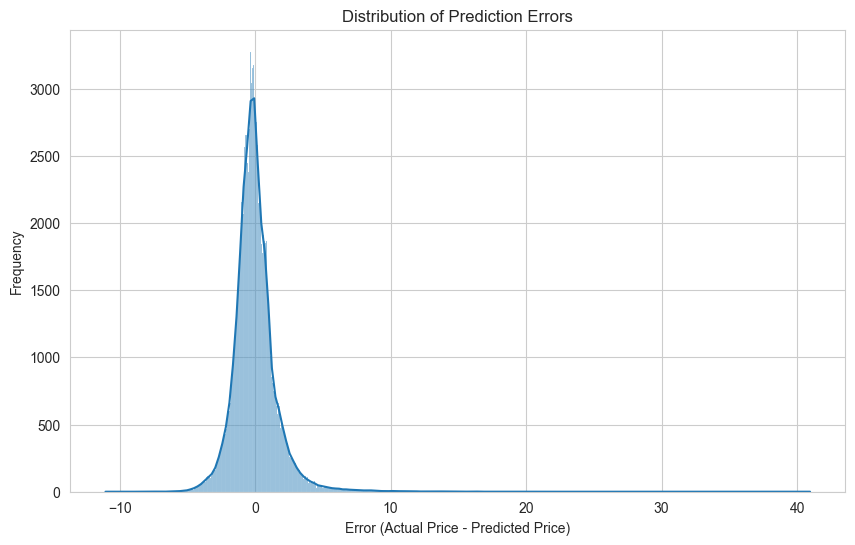

In [33]:
# Distribution of errors
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error (Actual Price - Predicted Price)')
plt.ylabel('Frequency')
plt.show()

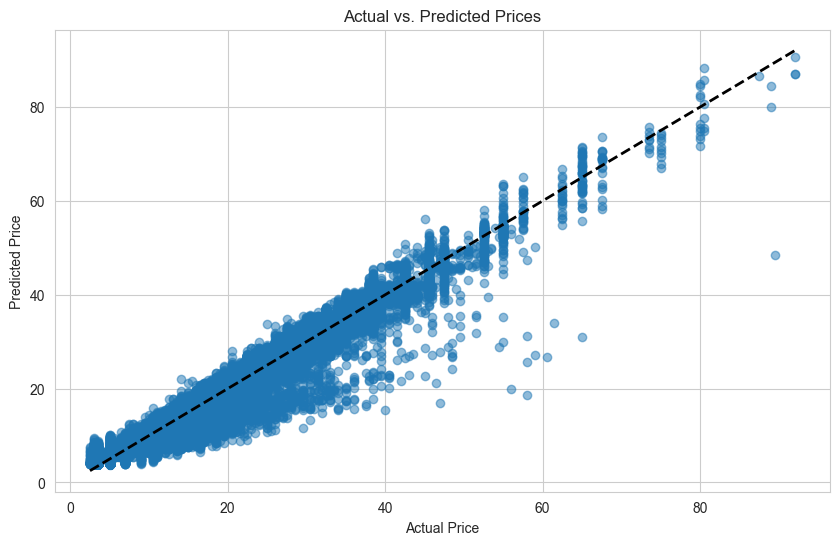

In [34]:
# Actual vs. Predicted scatter
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'k--', lw=2)  # diagonal line
plt.show()

### Hyperparameter Tuning with RandomizedSearchCV


In [35]:
# 1. Take a smaller sample for tuning (50k rows)
X_sample = X_train.sample(50000, random_state=42)
y_sample = y_train.loc[X_sample.index]

# 2. Define a smaller, smarter parameter grid
param_dist = {
    'n_estimators': [200, 300],     # number of boosting rounds
    'max_depth': [5, 7],            # tree depth
    'learning_rate': [0.05, 0.1],   # step size shrinkage
    'subsample': [0.8, 1.0],        # row sampling
    'colsample_bytree': [0.8, 1.0]  # feature sampling
}

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define pipeline (scaler + model)
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", xgb.XGBRegressor(objective="reg:squarederror", random_state=42, n_jobs=-1))
])

# Update param_dist → must use "model__" prefix
param_dist = {
    "model__n_estimators": [200, 300],
    "model__max_depth": [5, 7],
    "model__learning_rate": [0.05, 0.1],
    "model__subsample": [0.8, 1.0],
    "model__colsample_bytree": [0.8, 1.0]
}

# Randomized search
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=5,
    cv=2,
    scoring="r2",
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit search on sample
random_search.fit(X_sample, y_sample)


Fitting 2 folds for each of 5 candidates, totalling 10 fits


RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           device=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval_metric=None,
                                                           feature_types=None,
                                                           feature_weights=None,
                                                           gamma=None,
                                                           grow_po...
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=None,
                                                           n_jobs=-1,
                                                           num_parallel_tree=None, ...))]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'model__colsample_bytree': [0.8, 1.0],
                                        'model__learning_rate': [0.05, 0.1],
                                        'model__max_depth': [5, 7],
                                        'model__n_estimators': [200, 300],
                                        'model__subsample': [0.8, 1.0]},
                   random_state=42, scoring='r2', verbose=2)

In [37]:
# 5. Retrain best model on the FULL training set
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=1.0, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=-1,
                              num_parallel_tree=None, ...))])

In [38]:
# 6. Evaluate on test set
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"\nTuned Model MSE: {mse_best:.2f}")
print(f"Tuned Model R²: {r2_best:.2f}")


Tuned Model MSE: 2.94
Tuned Model R²: 0.97


### Feature Importance + SHAP


In [39]:
# --- 1. Feature Importance (built-in from XGBoost) ---
importances = best_model.named_steps['model'].feature_importances_
feature_names = X_train.columns

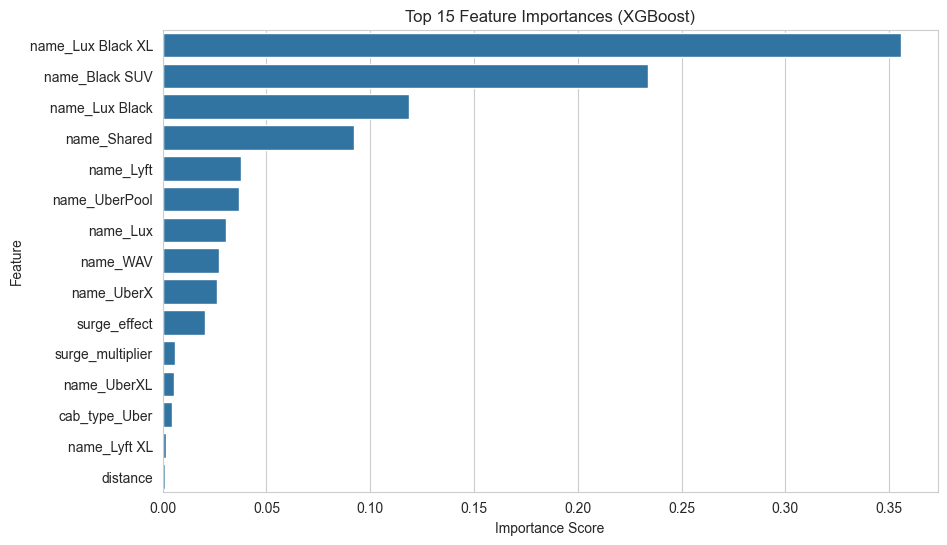

In [40]:
# Plot top 15 important features
importances = best_model.named_steps['model'].feature_importances_
feature_names = X_train.columns

# Get top 15 features
indices = np.argsort(importances)[-15:][::-1]
top_features = feature_names[indices]
top_importances = importances[indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_importances, y=top_features)
plt.title("Top 15 Feature Importances (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

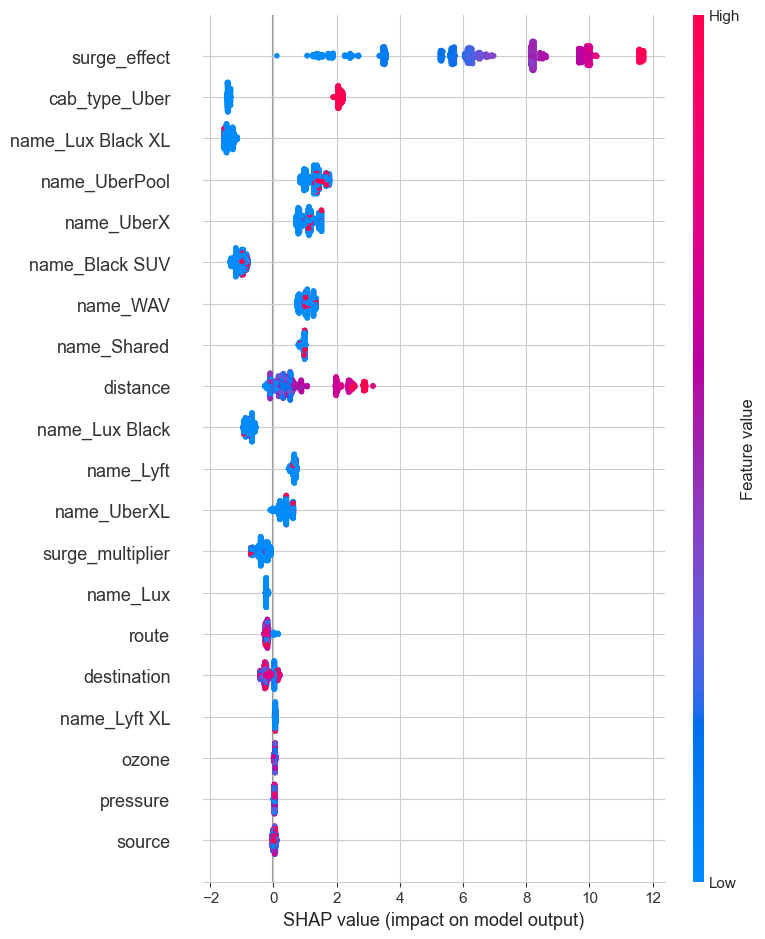

In [41]:
# Ensure numeric dtype for SHAP
X_train_float = X_train.astype(float)
X_test_float = X_test.astype(float)

explainer = shap.TreeExplainer(best_model.named_steps['model'])  # Use only the XGBoost model
shap_values = explainer.shap_values(X_test_float[:1000])  # subset for speed

# Summary plot (global effects)
shap.summary_plot(shap_values, X_test_float[:1000], feature_names=X_train.columns)

In [113]:
import joblib
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 5-feature dataset
feat_cols = ["distance", "surge_multiplier", "cab_type_Uber", "day_of_week", "is_weekend"]
X = df[feat_cols]
y = df["price"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess (just passthrough since cab_type_Uber is already 0/1)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", feat_cols)
    ]
)

# Pipeline
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", XGBRegressor(objective="reg:squarederror", random_state=42, n_jobs=-1))
])

# Train
pipe.fit(X_train, y_train)

# Quick check
pred = pipe.predict(X_test)
print("MSE:", mean_squared_error(y_test, pred))
print("R2 :", r2_score(y_test, pred))

# Save pipeline
joblib.dump(pipe, "xgb_rideshare_5feat_pipeline.pkl")
print("Saved pipeline ✅")


MSE: 71.27027665276984
R2 : 0.18249677474985726
Saved pipeline ✅


In [105]:
print(X_train.columns.tolist())


['hour', 'source', 'destination', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility', 'temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'temperatureMin', 'temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax', 'day_of_week', 'is_weekend', 'route', 'surge_effect', 'cab_type_Uber', 'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_UberPool', 'name_UberX', 'name_UberXL', 'name_WAV', 'weather_simple_cloudy', 'weather_simple_other', 'weather_simple_rainy']


In [42]:
# --- XGBoost model using ALL available features ---

import joblib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Use all engineered and encoded features except the target and dropped columns
columns_to_drop = [
    'price',         # target
    'day',           # replaced by day_of_week
    'month',         # optional
    'short_summary', # text weather description (not numeric)
    'long_summary',  # long text, not useful
    'icon'           # we already simplified into weather_simple
]
X_all = df.drop(columns=columns_to_drop, errors='ignore')
y_all = df['price']

# Split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42
)

# Pipeline with scaling
pipe_all = Pipeline([
    ("scaler", StandardScaler()),
    ("model", XGBRegressor(objective="reg:squarederror", random_state=42, n_jobs=-1))
])

# Train
pipe_all.fit(X_train_all, y_train_all)

# Evaluate
pred_all = pipe_all.predict(X_test_all)
print("ALL FEATURES - MSE:", mean_squared_error(y_test_all, pred_all))
print("ALL FEATURES - R2 :", r2_score(y_test_all, pred_all))

# Save
joblib.dump(pipe_all, "xgb_rideshare_allfeat_pipeline.pkl")
print("Saved all-features pipeline ")

ALL FEATURES - MSE: 2.765457252216143
ALL FEATURES - R2 : 0.9682789189384993
Saved all-features pipeline 
